# **Analisis exploratiorio de base de transacciones**

El siguiente set de datos muestra las transacciones de Agosto-Octubre 2025 de una Fintech Salvadoreña. Son datos de transacciones de 3 paises, por lo que los montos vienen en diferentes monedas, asi también la hora de la transacción ya está ajustada a la hora de dicho pais.

La base suele usarse para segmentar tamaños de comercio en base a lo que transaccionan al mes, ver tendencias de volumen procesado mensualmente, categorizar montos transaccionados por Inbound/Outbound, ver cantidad de transacciones exitosas y rechazadas mensualmente y así tambien ver mayor razón de rechazo.

Dentro del set de datos se busca encontrar patrones relacionados a las transacciones con el fin de entender métricas clave y generar métricas significativas al comercio

El diccionario de datos es el siguiente:
- **id_comercio** es el id único para cada comercio que transacciona
- **company_created_at** estampa de tiempo de fecha de creación de comercio
- **categoria** giro del comercio, es la categoria en la que opera el comercio
- **is_taxpayer** se refiere a que si el comercio que realiza la transacción es pagador de impuesto
- **tipo_comercio** tipo de comercio
- **banco_afiliacion_comercio** banco al que esta afiliado el comercio
- **id_transaccion** es el id único por cada transacción
- **monto** monto de la transacción
- **currency_iso** es el símbolo para distinguir el tipo de moneda
- **tipo_transaccion** es el tipo de transacción realizada
- **modo_lectura**
- **pos_id**
- **transaction_created_at** es la fecha y hora en la que se realizó la transacción
- **lat**
- **log**
- **card_bran** Marca de la tarjeta usada para el pago
- **pais** país donde se realizó la transacción
- **vendedores** es el id único de los vendedores vinculados a ese comercio, esto quiere decir que si un comercio tiene un vendedor vinculado, es porque ese comercio se vinculó por un departamento Comercial y no por marketing puro, a estas dos categorías se le conoce como Outbound e inbound respectivamente
- **modelos_pos**
- **pos_ids**


In [2]:
#Importar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import percentileofscore

In [3]:
# Cargar el dataset
df = pd.read_csv('../dataset/Fintech_Trans_Agosto_Octubre_2025.csv')

# Mostrar primeras filas e información
print(df.shape)
df.head()

(403535, 20)


,id_comercio,company_created_at,categoria,is_taxpayer,tipo_comercio,banco_afiliacion_comercio,id_transaccion,monto,currency_iso,tipo_transaccion,modo_lectura,pos_id,transaction_created_at,lat,long,card_brand,pais,vendedores,modelos_pos,pos_ids
0,21981,2024-04-25 19:18:46.102734,Educación y deportes,True,Society,CREDICORPBANK,2359347,37430,Colon costarricense,LINK,NaN,NaN,2025-08-01 12:16:08.069000,NaN,NaN,mastercard,Panamá,NaN,NaN,NaN
1,21981,2024-04-25 19:18:46.102734,Educación y deportes,True,Society,CREDICORPBANK,2359522,37430,Colon costarricense,LINK,NaN,NaN,2025-08-01 00:06:16.372000,NaN,NaN,visa,Panamá,NaN,NaN,NaN
2,21981,2024-04-25 19:18:46.102734,Educación y deportes,True,Society,CREDICORPBANK,2363347,31500,Colon costarricense,LINK,NaN,NaN,2025-08-01 22:16:34.765000,NaN,NaN,visa,Panamá,NaN,NaN,NaN
3,21981,2024-04-25 19:18:46.102734,Educación y deportes,True,Society,CREDICORPBANK,2363503,29925,Colon costarricense,LINK,NaN,NaN,2025-08-01 07:25:28.860000,NaN,NaN,visa,Panamá,NaN,NaN,NaN
4,21981,2024-04-25 19:18:46.102734,Educación y deportes,True,Society,CREDICORPBANK,2363771,37430,Colon costarricense,LINK,NaN,NaN,2025-08-01 00:07:54.663000,NaN,NaN,visa,Panamá,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_comercio                403535 non-null  int64  
 1   company_created_at         403535 non-null  object 
 2   categoria                  403535 non-null  object 
 3   is_taxpayer                403535 non-null  bool   
 4   tipo_comercio              403535 non-null  object 
 5   banco_afiliacion_comercio  403142 non-null  object 
 6   id_transaccion             403535 non-null  int64  
 7   monto                      403535 non-null  int64  
 8   currency_iso               403535 non-null  object 
 9   tipo_transaccion           403535 non-null  object 
 10  modo_lectura               348731 non-null  object 
 11  pos_id                     348731 non-null  float64
 12  transaction_created_at     403535 non-null  object 
 13  lat                        34

In [5]:
#Conteo de registros nulos 
df.isnull().sum()

id_comercio                       0
company_created_at                0
categoria                         0
is_taxpayer                       0
tipo_comercio                     0
banco_afiliacion_comercio       393
id_transaccion                    0
monto                             0
currency_iso                      0
tipo_transaccion                  0
modo_lectura                  54804
pos_id                        54804
transaction_created_at            0
lat                           56542
long                          56542
card_brand                     1968
pais                              0
vendedores                   241455
modelos_pos                   39724
pos_ids                       39724
dtype: int64

**Notas:**
* El dataset original contiene con **403535** registros en total y **20** columnas/variables/features
* Las columnas **banco_afiliacion_comercio** **modo_lectura**, **pos_id** , **modelo_pos**, **lat** **log** **card_brand** y **vendedores** contienen valores nulos (en las variables card_brand y las variables de POS (modo_lectura, pos_id, modelo_pos) es normal ya que no todas las transacciones se pagan con tarjetas de crédito, al igual id_vendedor puede ser nulo en las transacciones tipo Inbound pero los otros campos se debe investigar y analizar si es normal esos valores nulos o son valores faltantes).

## Clasificación de variables

Procedemos a categorizar los datos y establecer el tipo de dato

| Variable | Descripción | Clasificación | Tipo de Dato (Python/Pandas) |
| :--- | :--- | :--- | :--- |
| **id_comercio** | ID único para cada comercio que transacciona | Cualitativo Nominal | Category |
| **company_created_at** | Estampa de tiempo de fecha de creación de comercio | Temporal | datetime64 |
| **categoria** | Giro en la que opera el comercio | Cualitativo Nominal | Category |
| **is_taxpayer** | Se refiere a que si el comercio que realiza la transacción es pagador de impuesto | Cualitativo Nominal Binario | bool |
| **tipo_comercio** | Tipo de comercio | Cualitativo Nominal | Category |
| **banco_afiliacion_comercio** | Banco al que esta afiliado el comercio que usa POS | Cualitativo Nominal | Category |
| **id_transaccion** | ID único por cada transacción, cada registro | Identificador | int64 |
| **monto** | Monto de la transacción formato entero sin decimales | Cuantitativo Continuo | int64 |
| **currency_iso** | Nombre de la moneda usada en la transacción | Cualitativo Nominal | Category |
| **tipo_transaccion** | Tipo de transacción realizada | Cualitativo Nominal | Category |
| **modo_lectura** | Modo lectura del POS | Cualitativo Nominal | Category |
| **pos_id** | id de POS | Cualitativo Nominal | Category |
| **transaction_created_at** | Fecha y hora de transacción | Temporal | datetime64 |
| **lat** | Latitud Geolozalización| Cuantitativo Continuo | float64 |
| **long** | Longitud Geolozalización| Cuantitativo Continuo | float64 |
| **card_brand** | Marca de la tarjeta usada para el pago | Cualitativo Nominal | Category |
| **pais** | País donde se realizó la transacción | Cualitativo Nominal | Category |
| **vendedores** | Listado de IDs único del vendedor vinculado a ese comercio | Cualitativo Nominal | Category |
| **modelos_pos** | Listado de Modelos de  POS disponibles | Cualitativo Nominal | Category |
| **pos_ids** | Listado de ids de POS | Cualitativo Nominal | Category |

In [8]:
#Setear tipos de vriables segun clasificacion
# 1. Definir el diccionario de mapeo de tipos
mapeo_tipos = {
    'id_comercio': 'category', # Convertir a Category (eficiencia de memoria)
    'categoria': 'category', # Convertir a Category (eficiencia de memoria)
    'tipo_comercio': 'category', # Convertir a Category (eficiencia de memoria)
    'banco_afiliacion_comercio': 'category', # Convertir a Category (eficiencia de memoria)
    'currency_iso': 'category', # Convertir a Category (eficiencia de memoria)
    'tipo_transaccion': 'category', # Convertir a Category (eficiencia de memoria)
    'modo_lectura': 'category', # Convertir a Category (eficiencia de memoria)
    'pos_id': 'category', # Convertir a Category (eficiencia de memoria)
    'modelos_pos': 'category', # Convertir a Category (eficiencia de memoria)
    'card_brand': 'category', # Convertir a Category (eficiencia de memoria)
    'pais': 'category', # Convertir a Category (eficiencia de memoria)
    'vendedores': 'category',# Convertir a Category (eficiencia de memoria)
    'pos_ids': 'category', # Convertir a Category (eficiencia de memoria)
    'monto': 'Int64', #No hay decimales para obtener el valor original hay que dividir entre 100
    'lat': 'float64', 
    'long': 'float64',
    'is_taxpayer': 'bool', # Convertir a Booleano
    'id_transaccion': 'Int64',  # Convertir a Int64
}

# 2. Aplicar la conversión a todo el DataFrame a la vez
df = df.astype(mapeo_tipos)

#Convercion de variables tipo fecha/hora
#No tomaremos en cuenta los milisegundos para evitar error de conversion
# Expresión regular: busca un punto seguido de uno o más dígitos al final de la cadena
# La parte '\.\d+' busca el patrón ". [uno o más dígitos]"
# El signo de dólar '$' asegura que solo coincida si el patrón está al final
regex_milisegundos = r'\.\d+$'

# Truncar los milisegundos y el punto de la cadena
df['transaction_created_at'] = df['transaction_created_at'].str.replace(
    regex_milisegundos,
    '', # Reemplaza con una cadena vacía
    regex=True
)
df['company_created_at'] = df['company_created_at'].str.replace(
    regex_milisegundos,
    '', # Reemplaza con una cadena vacía
    regex=True
)
df['transaction_created_at'] = pd.to_datetime(df['transaction_created_at'], format="%Y-%m-%d %H:%M:%S", errors='coerce')
df['company_created_at'] = pd.to_datetime(df['company_created_at'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

print("Tipos de Datos Convertidos:")
print(df.dtypes)

Tipos de Datos Convertidos:
id_comercio                        category
company_created_at           datetime64[ns]
categoria                          category
is_taxpayer                            bool
tipo_comercio                      category
banco_afiliacion_comercio          category
id_transaccion                        Int64
monto                                 Int64
currency_iso                       category
tipo_transaccion                   category
modo_lectura                       category
pos_id                             category
transaction_created_at       datetime64[ns]
lat                                 float64
long                                float64
card_brand                         category
pais                               category
vendedores                         category
modelos_pos                        category
pos_ids                            category
dtype: object


In [9]:
#Conteo de registros unicos de variables categoricas
df_categoricas = df.select_dtypes(include=['category'])
df_categoricas.nunique()

id_comercio                  12061
categoria                     1944
tipo_comercio                    2
banco_afiliacion_comercio       47
currency_iso                     7
tipo_transaccion                11
modo_lectura                     2
pos_id                       11310
card_brand                       2
pais                             3
vendedores                     127
modelos_pos                     89
pos_ids                      11645
dtype: int64

In [10]:
print("--- Valores Únicos por Columna ---")

# Itera sobre cada columna en el DataFrame
for columna in df_categoricas.columns:
    # Obtiene los valores únicos de la columna actual
    valores_unicos = df[columna].unique()
    
    # Imprime el nombre de la columna y sus valores únicos
    print(f"\nColumna: **{columna}**")
    print(valores_unicos)
    print("-" * 30) # Separador para mejor legibilidad

--- Valores Únicos por Columna ---

Columna: **id_comercio**
[21981, 21979, 21982, 21977, 21978, ..., 41499, 34234, 26574, 33405, 46722]
Length: 12061
Categories (12061, int64): [5, 22, 63, 75, ..., 46711, 46712, 46714, 46722]
------------------------------

Columna: **categoria**
['Educación y deportes', 'Turismo y recreación', 'Servicios Profesionales', 'Restaurantes, bares y hostelería', 'Electrónicos y computación', ..., 'renta cars', 'belleza y cuidado personal, ropa, calzado y a..., 'eventos', 'Venta de Panes ', 'Estudio Fotográfico']
Length: 1944
Categories (1944, object): [' Fabricacion de uniformes y sublimación ', ' herramienta y antigüedades ', '3ra categoria', 'ACCESORIOS DE CARRO Y MOTOS', ..., 'óptica ,venta de aros y lentes ', 'óptica Examen Visual y ventas de gafas Oftalm..., 'óptica venta de lentes y accesorios ', 'útiles escolares y papelería']
------------------------------

Columna: **tipo_comercio**
['Society', 'Natural person']
Categories (2, object): ['Natural pe

# **Auditoria de los datos**

Verificaremos duplicados, nulos, validaciones de negocio
<br>
**Nota Importante:** Una misma transacción puede pasar por varios estados "DRAFT", "PENDING", "REJECTED", "SUCCEDEED", "REFOUND" y cada etapa se registra en la BD por lo que el dataser contiene registros duplicados con la misma **id_transaccion** para el análisis a realizar sólo nos interesa el estado final de cada transacción y que esten completas. Por lo que procedemos a eliminar duplicados dejando el último registro de cada transacción.

In [12]:
#Valores nulos
conteo_nulos = df.isnull().sum() 
print(conteo_nulos)

id_comercio                       0
company_created_at                0
categoria                         0
is_taxpayer                       0
tipo_comercio                     0
banco_afiliacion_comercio       393
id_transaccion                    0
monto                             0
currency_iso                      0
tipo_transaccion                  0
modo_lectura                  54804
pos_id                        54804
transaction_created_at            0
lat                           56542
long                          56542
card_brand                     1968
pais                              0
vendedores                   241455
modelos_pos                   39724
pos_ids                       39724
dtype: int64


### Exploración de transacciones con valores card_brand Nulos

Las transacciones que pueden tener valores nulos en card_brand son aquellas no estan ligadas a un pago con tarjeta de credito

In [14]:
# 1. Identificar los nulos en 'card_brand' (True/False)
# 2. Agrupar el resultado booleano por 'tipo_transaccion'
# 3. Sumar (True se cuenta como 1, False como 0) para obtener el total de nulos por grupo

conteo_card_brand_nulos = df['card_brand'].isnull().groupby(df['tipo_transaccion'], observed=False).sum()
print(conteo_card_brand_nulos)

tipo_transaccion
CASH                       1787
LINK                          0
LINK-API                      0
LINK-MSI                      0
POS                           0
POS-MSI                       0
QR                            0
QR-MSI                        0
REUSABLE-WITH-AMOUNT          0
REUSABLE-WITHOUT-AMOUNT       0
SUBSCRIPTION                181
Name: card_brand, dtype: int64


### Exploración de transacciones con valores lat y long Nulos

Es normal que algunas transacciones no tengan lat y long

In [16]:
# 1. Crear una Serie booleana: (lat es nulo) O (long es nulo)
nulos_lat_o_long = df['lat'].isnull() | df['long'].isnull()
conteo_lat_long_nulos = nulos_lat_o_long.groupby(df['tipo_transaccion'], observed=False).sum()
print(conteo_lat_long_nulos)

tipo_transaccion
CASH                        1787
LINK                       51218
LINK-API                       4
LINK-MSI                     974
POS                         1718
POS-MSI                       20
QR                           157
QR-MSI                         4
REUSABLE-WITH-AMOUNT         112
REUSABLE-WITHOUT-AMOUNT      319
SUBSCRIPTION                 229
dtype: int64


# Eliminar registros duplicados #

El identificador de transacción única es la columna **id_transaccion**

In [18]:
#Encontrar registros duplicados
df.loc[df['id_transaccion'].duplicated(),:].head()

,id_comercio,company_created_at,categoria,is_taxpayer,tipo_comercio,banco_afiliacion_comercio,id_transaccion,monto,currency_iso,tipo_transaccion,modo_lectura,pos_id,transaction_created_at,lat,long,card_brand,pais,vendedores,modelos_pos,pos_ids


**NOTA** No se observan registros duplicados

In [20]:
#Encontrar y eliminar registros duplicados
df_original  = df.copy();
# Aplicar drop_duplicates al ID de transacción.
# 'keep="first"' conservará el primer registro encontrado
# Reseteamos el indice con reset_index(drop=True)
df = df.drop_duplicates(
    subset=['id_transaccion'],
    keep='first'
).reset_index(drop=True)

print(f"Número de transacciones originales (intentos): {len(df_original)}")
print(f"Número de transacciones únicas (registros finales): {len(df)}")
print(f"Número de duplicados eliminados: {len(df_original) - len(df)}")
print("\nDataFrame con transacciones finales:")
print(df.info())

Número de transacciones originales (intentos): 403535
Número de transacciones únicas (registros finales): 403535
Número de duplicados eliminados: 0

DataFrame con transacciones finales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_comercio                403535 non-null  category      
 1   company_created_at         403535 non-null  datetime64[ns]
 2   categoria                  403535 non-null  category      
 3   is_taxpayer                403535 non-null  bool          
 4   tipo_comercio              403535 non-null  category      
 5   banco_afiliacion_comercio  403142 non-null  category      
 6   id_transaccion             403535 non-null  Int64         
 7   monto                      403535 non-null  Int64         
 8   currency_iso               403535 non-null  category      

**AGREGAR COLUMNAS ADICIONALES DE INTERES**
* Se calcula columna adicional para indicar el tipo de area outbound o inbound
* Como el monto esta en diferentes monedas es necesario homologar los valores a USD (Dólares Estadounidense) para realizar cualquier analisis comparativo eficiente. Por lo tanto se agregaran 2 columnas tasa_conversion y monto_usd
* Descoponer fecha en mes y dia de la semana y hora

In [22]:
# Calcular columna area
df['area'] = np.where(
    df['vendedores'].isna(),
    'Inbound',
    'Outbound'
)
df['area'] = df['area'].astype('category')

In [23]:
#ANALISIS DE PAIS/MONEDA
#Estados y transaction_type ligados a transacciones con card_brand nulos
df_country_moneda_group = df.groupby(['pais','currency_iso'], observed=False).size()
df_country_moneda_group_conteos = df_country_moneda_group.reset_index(name='conteo')
df_country_moneda_group_conteos[df_country_moneda_group_conteos['conteo'] > 0].sort_values(by='conteo', ascending=False)

,pais,currency_iso,conteo
2,El Salvador,Dolar estadounidense,193967
13,Guatemala,Quetzal,115818
16,Panamá,Dolar estadounidense,62959
20,Panamá,Quetzal,9200
17,Panamá,Lempira,6345
18,Panamá,Mexican Peso,4717
19,Panamá,Peso Dominicano,4139
14,Panamá,Colon costarricense,3499
15,Panamá,Cordoba,2890
6,El Salvador,Quetzal,1


Se observan diferencias de moneda incluso en un mismo país por lo que la mejor opción es convertir a USD (Dolares Estadounidense) todos los montos antes de analizar la variable

**Nota Importante**: En el dataset la cantidad en amount vienen solo enteros sin decimales es decir que hay que dividir entre 100 para obtener el valore real.

In [25]:
#Calcular columna amount_usd
# Tasa de conversión: 1 unidad de la moneda local = X USD
# ESTO DEBE ACTUALIZARSE CON DATOS REALES Y VIGENTES
TASAS_A_USD = {
    'Dolar estadounidense': 1.00,
    'Quetzal': 0.13023,
    'Lempira': 0.038148,
    'Mexican Peso': 0.054352,
    'Colon costarricense': 0.001986,
    'Peso Dominicano': 0.015971,
    'Cordoba': 0.027129
}

# Mapear tasas
df['tasa_conversion'] = df['currency_iso'].map(TASAS_A_USD).astype(float)

# Calcular monto en USD
# y luego se convierte a dolares multiplicando por la tasa de conversion
# al final redondeamos a 2 decimales
df['monto_usd'] = round(df['monto'] * df['tasa_conversion'], 2)

#Verificar conversion a dolares
df[['currency_iso','monto','tasa_conversion','monto_usd']].head(100)

,currency_iso,monto,tasa_conversion,monto_usd
0,Colon costarricense,37430,0.001986,74.34
1,Colon costarricense,37430,0.001986,74.34
2,Colon costarricense,31500,0.001986,62.56
3,Colon costarricense,29925,0.001986,59.43
4,Colon costarricense,37430,0.001986,74.34
...,...,...,...,...
95,Dolar estadounidense,43,1.000000,43.0
96,Dolar estadounidense,54,1.000000,54.0
97,Dolar estadounidense,54,1.000000,54.0
98,Dolar estadounidense,54,1.000000,54.0


In [26]:
#Descomponer fecha
df["mes"] = df["transaction_created_at"].dt.month_name().astype('category')
df["dia_semana"] = df["transaction_created_at"].dt.day_name().astype('category')
df["hora"] = df["transaction_created_at"].dt.hour.astype('category')

In [27]:
#Verificamos df final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_comercio                403535 non-null  category      
 1   company_created_at         403535 non-null  datetime64[ns]
 2   categoria                  403535 non-null  category      
 3   is_taxpayer                403535 non-null  bool          
 4   tipo_comercio              403535 non-null  category      
 5   banco_afiliacion_comercio  403142 non-null  category      
 6   id_transaccion             403535 non-null  Int64         
 7   monto                      403535 non-null  Int64         
 8   currency_iso               403535 non-null  category      
 9   tipo_transaccion           403535 non-null  category      
 10  modo_lectura               348731 non-null  category      
 11  pos_id                     348731 non-null  category

**Notas despues de la limpieza de datos y transformación:**
* El dataset a analizar cuenta con **403535** transacciones en total con **23** variables
* Las columnas **card_brand** y **vendedores** contienen valores nulos normales en transacciones de negocio.

In [29]:
df.head()

,id_comercio,company_created_at,categoria,is_taxpayer,tipo_comercio,banco_afiliacion_comercio,id_transaccion,monto,currency_iso,tipo_transaccion,...,pais,vendedores,modelos_pos,pos_ids,area,tasa_conversion,monto_usd,mes,dia_semana,hora
0,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2359347,37430,Colon costarricense,LINK,...,Panamá,NaN,NaN,NaN,Inbound,0.001986,74.34,August,Friday,12
1,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2359522,37430,Colon costarricense,LINK,...,Panamá,NaN,NaN,NaN,Inbound,0.001986,74.34,August,Friday,0
2,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2363347,31500,Colon costarricense,LINK,...,Panamá,NaN,NaN,NaN,Inbound,0.001986,62.56,August,Friday,22
3,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2363503,29925,Colon costarricense,LINK,...,Panamá,NaN,NaN,NaN,Inbound,0.001986,59.43,August,Friday,7
4,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2363771,37430,Colon costarricense,LINK,...,Panamá,NaN,NaN,NaN,Inbound,0.001986,74.34,August,Friday,0


## ANALISIS DE VARIABLES CUALITATIVAS ##



In [31]:
def tabla_frecuencias(df, col):
    n = len(df[col])
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True).round(4)
    tabla = pd.DataFrame({'Frecuencia Absoluta': freq_abs,
                          'Frecuencia Relativa': freq_rel,
                          'Frecuencia Acumulada': freq_abs.cumsum().values,
                          'Frecuencia Rel. Acumulada %': (freq_abs.cumsum().values / n * 100).round(2)
                         })
    return tabla

In [32]:
# Variables cualitativas de interes

df_categoricas = df.select_dtypes(include=['category'])
cat_vars = df_categoricas.columns
print("\nNúmero de categorías por variable cualitativa:")

# Para cada columna en cat_vars utilizamos el método nunique que cuenta
# cuantos valores diferentes se presentan en esa variable o columna,
# esto se logra utilizando el bucle for, que ayuda a recorrer la lista
# de variables que se han determinado

for var in cat_vars :
    print(f"{var}: {df[var].nunique()} categorías")


Número de categorías por variable cualitativa:
id_comercio: 12061 categorías
categoria: 1944 categorías
tipo_comercio: 2 categorías
banco_afiliacion_comercio: 47 categorías
currency_iso: 7 categorías
tipo_transaccion: 11 categorías
modo_lectura: 2 categorías
pos_id: 11310 categorías
card_brand: 2 categorías
pais: 3 categorías
vendedores: 127 categorías
modelos_pos: 89 categorías
pos_ids: 11645 categorías
area: 2 categorías
mes: 3 categorías
dia_semana: 7 categorías
hora: 24 categorías


In [33]:

# Utilizando un bucle for y la función tabla_frecuencias sobre las
# variables categóricas obtenemos la distribución de frecuencias
# absolutas y relativas para cada una de las variables cualitativas.
# la instrucción '='*40 imprime una secuencia de 40 símbolos “igual”
# para separar la información de las diferentes variables

for col in cat_vars:
    print(f"\n{'='*40}\nTabla de frecuencias - Columna: {col}\n{'='*40}")
    print(tabla_frecuencias(df, col))


Tabla de frecuencias - Columna: id_comercio
             Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada  \
id_comercio                                                                   
21978                       9200               0.0228                  9200   
21977                       6794               0.0168                 15994   
21979                       6345               0.0157                 22339   
37342                       5114               0.0127                 27453   
35874                       4329               0.0107                 31782   
...                          ...                  ...                   ...   
30079                          1               0.0000                403531   
43584                          1               0.0000                403532   
30042                          1               0.0000                403533   
30010                          1               0.0000                403534   
46722  

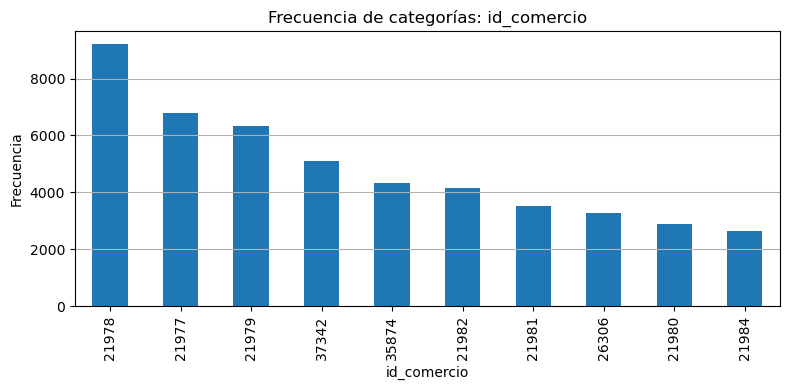

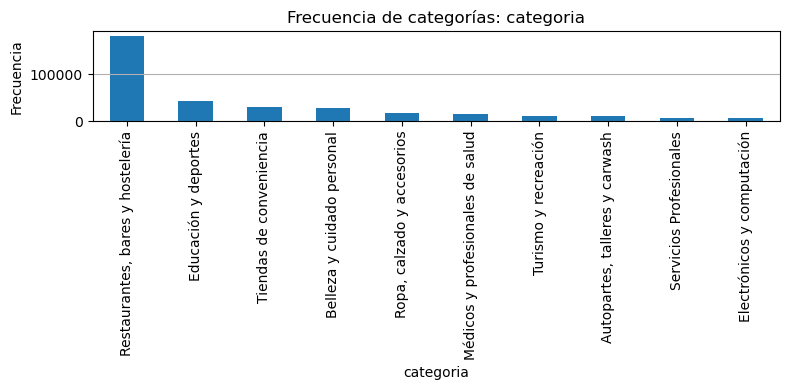

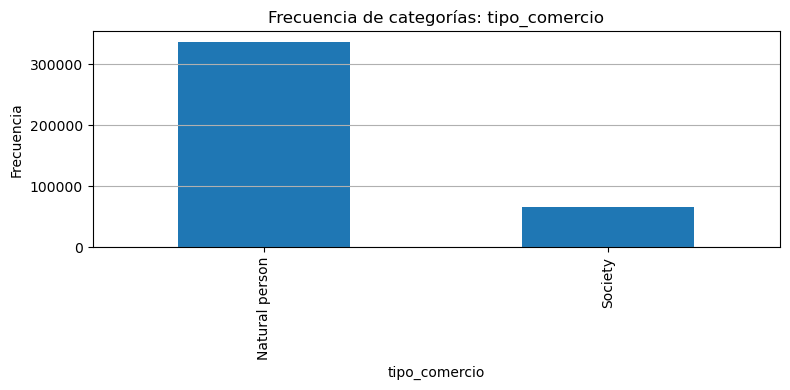

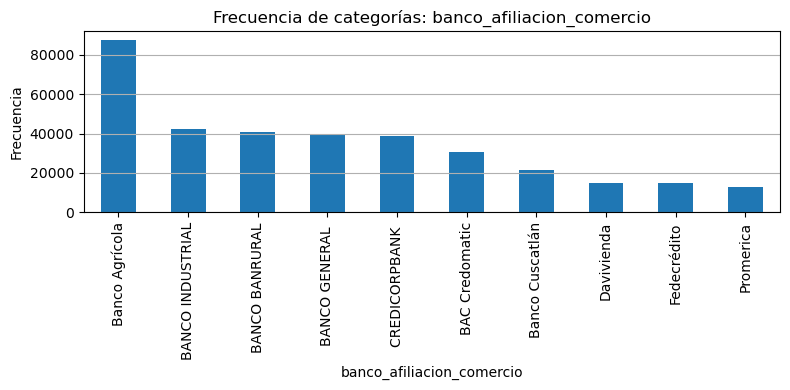

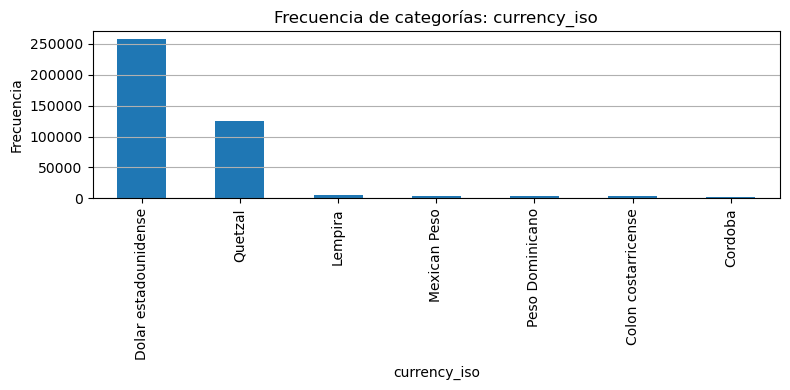

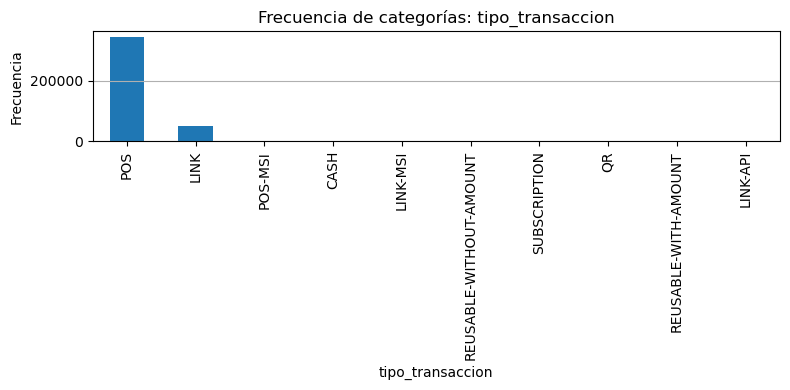

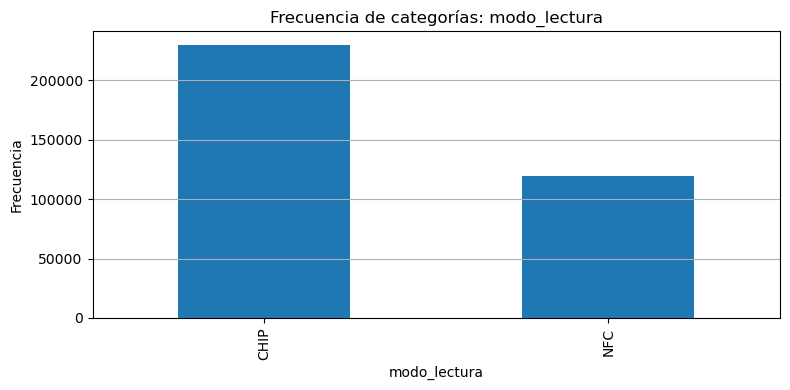

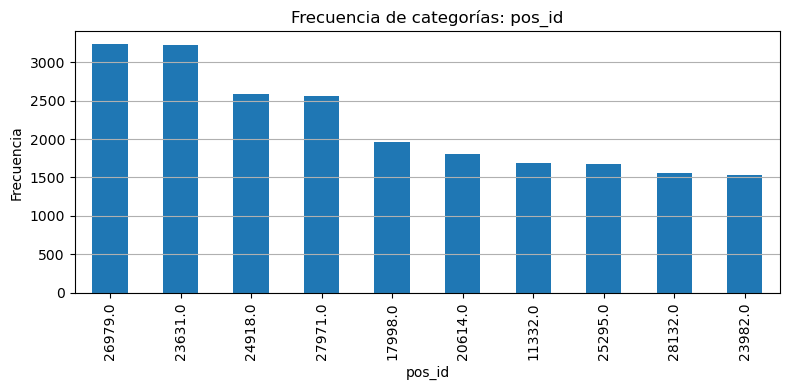

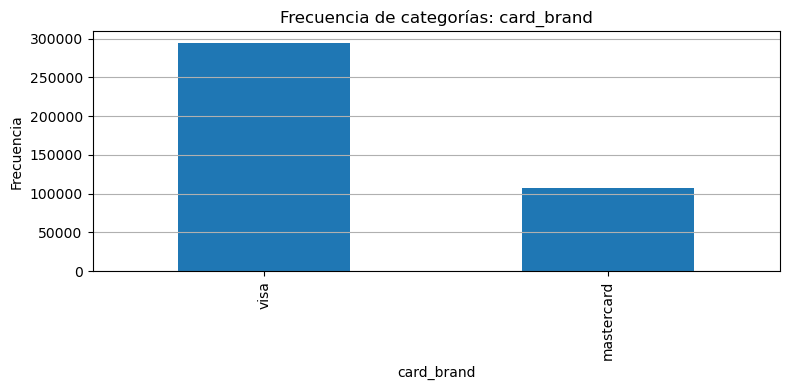

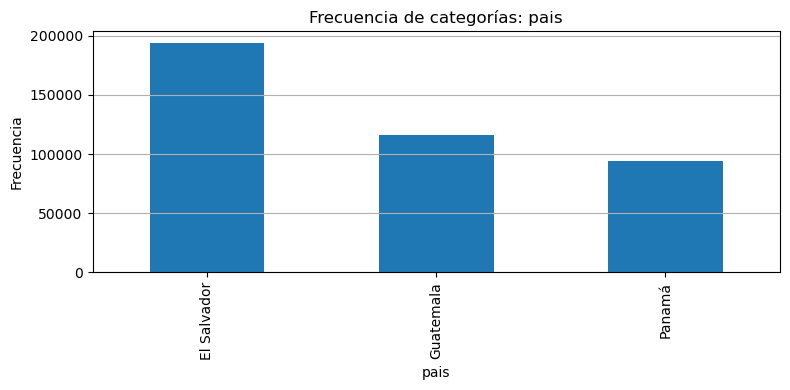

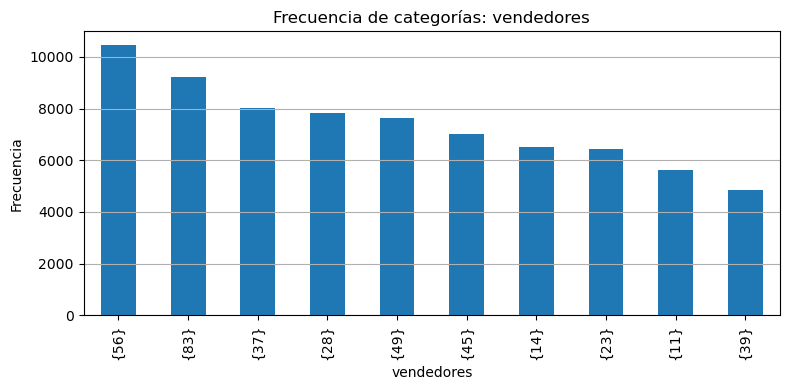

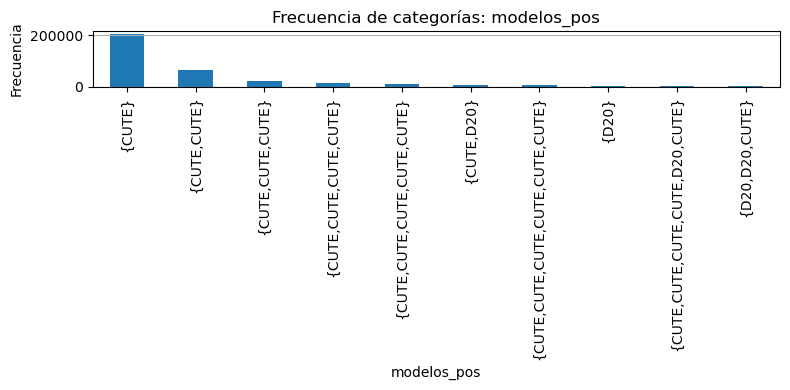

C:\Users\marlo\AppData\Local\Temp\ipykernel_20780\1786786292.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


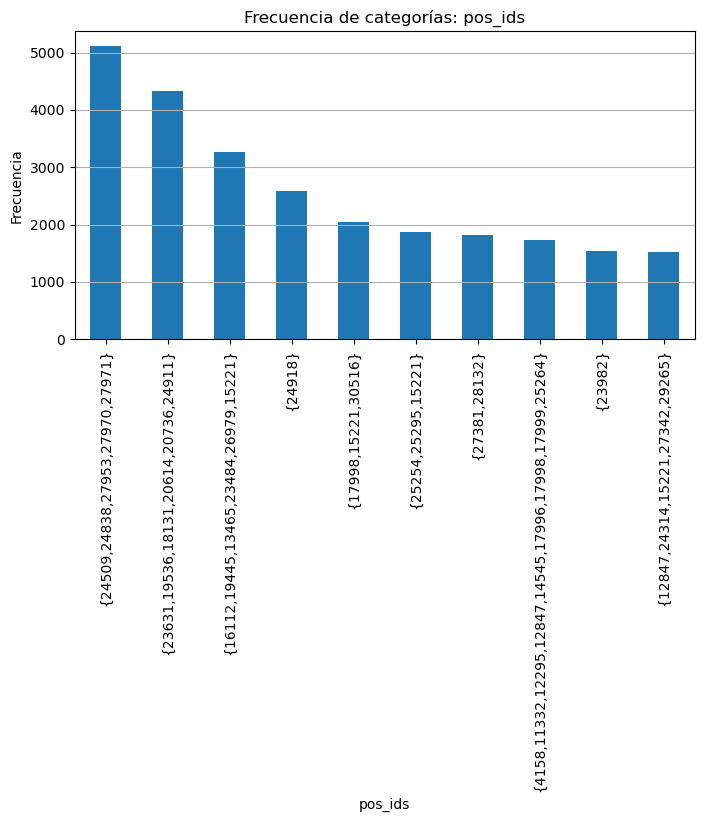

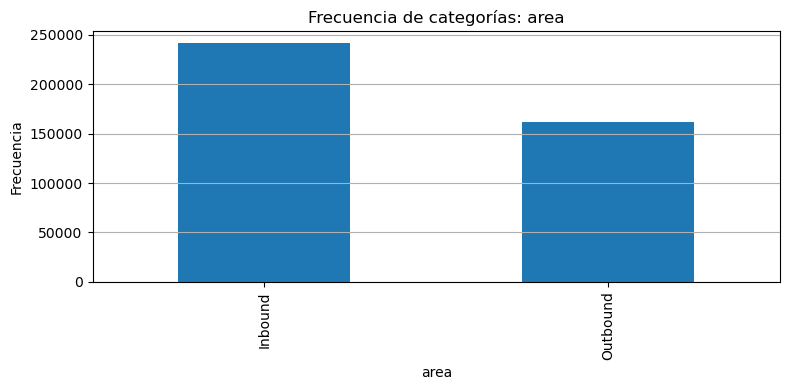

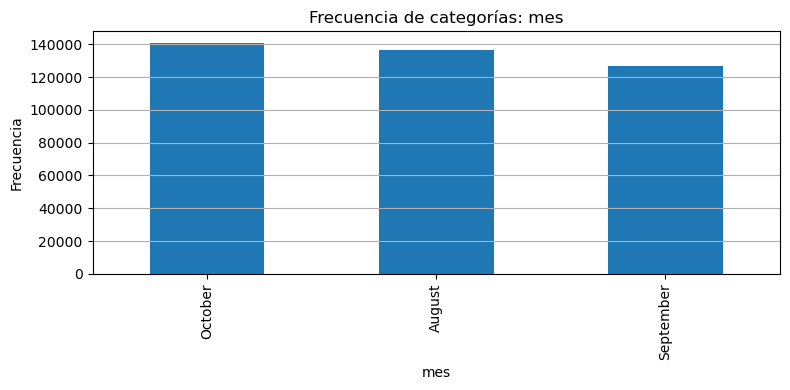

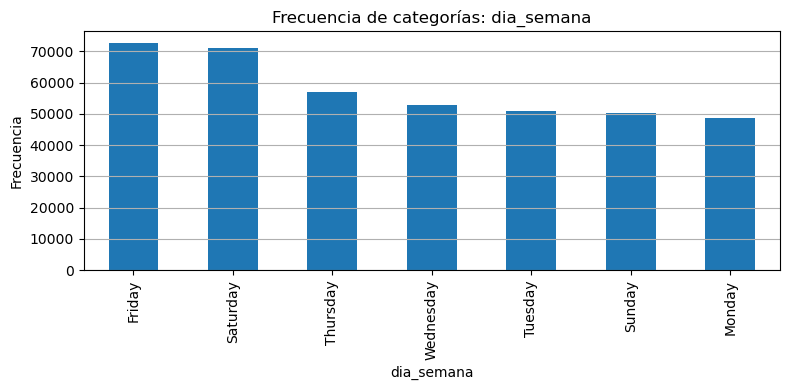

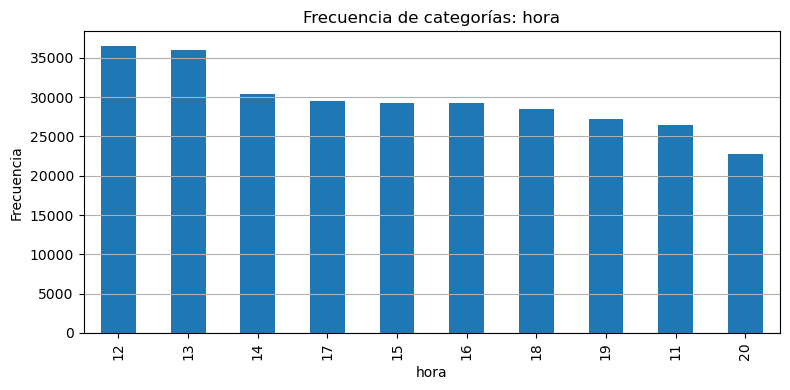

In [34]:
# Gráficos de barras para variables categóricas
# Para cada una de las variables categóricas
# excepto la primera (student_id) porque no nos interesa
for var in cat_vars[0:]:
    # Creamos una figura
    plt.figure(figsize=(8, 4))

    # df[var].value_counts() cuenta cuántas veces aparece cada valor
    # único (categoría) dentro de la columna var. Por defecto, este
    # método ordena los resultados de mayor a menor frecuencia.
    df[var].value_counts().head(10).plot(kind='bar')

    # plot(kind='bar') toma los resultados de value_counts() y
    # genera un gráfico de barras, donde cada barra representa una
    # categoría y su altura corresponde a su frecuencia en los datos.

    # Añade título, etiquetas, grilla, leyenda y muestra el gráfico
    # con un ajuste automático de márgenes.
    plt.title(f'Frecuencia de categorías: {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

## INTERPRETACIONES ##
*   El ***86%*** de las transacciones se realizan por medio de ***POS***, el ***12%*** son realizadas por **LINK** y menos de un **1%** son con **CASH**.
*   El ***64%*** de las transacciones son en Dólares **USD**, **31%** usan Quezales **GTQ** y el resto en otras divisas.
* El **73%** de las transacciones fueron pagadas con tarjeta **VISA** y el **26%** con **MASTERCARD**.
*   **El Salvador** aporta el **48%** de las transacciones mientras que **Guatemala** un **28%** y el resto es aportado por **Panama** con un **23%**.
*   Las transacciones realizadas por mes tienen una tendencia similar siendo Octubre el mes con mas transacciones **140000** seguido de Agosto con **136000**, en general el flujo de transacciones por mes es estable.
*   Se registra un pico de transacciones en horas del medio dia **12-13 hrs**. y el resto de la tarde hasta las **20 hrs.** Durante la mañana el flujo de transacciones es mucho menor.
*   Igualmente se registra un ligero incremento de transacciones durante los dias de la semana a partir del día **Lunes** que es el dia con menos transacciones hasta los **Viernes y Sabado** los que presentan mayores transacciones durante la semana.
* El rubro de empresas que mas genera transacciones es el de **Restaurantes, Bares y hostelería** aportando el 45% del total de transacciones.
* La Empresa con mas transacciones realizadas es la compañia No.21978 con 21977 transacciones por lo que se observa que existe diversidad de participación de empresas.

## ANALISIS DE VARIABLES CUANTITATIVAS ##


In [37]:
df_numeric = df.select_dtypes(include=['number'])
num_vars = df_numeric.columns

In [38]:
def boxplot_analysis(df):
    num_cols = df.columns

    # Crear subgráficos
    fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))
    
    # Generar boxplots individuales
    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col)
    
    plt.tight_layout()
    plt.show()


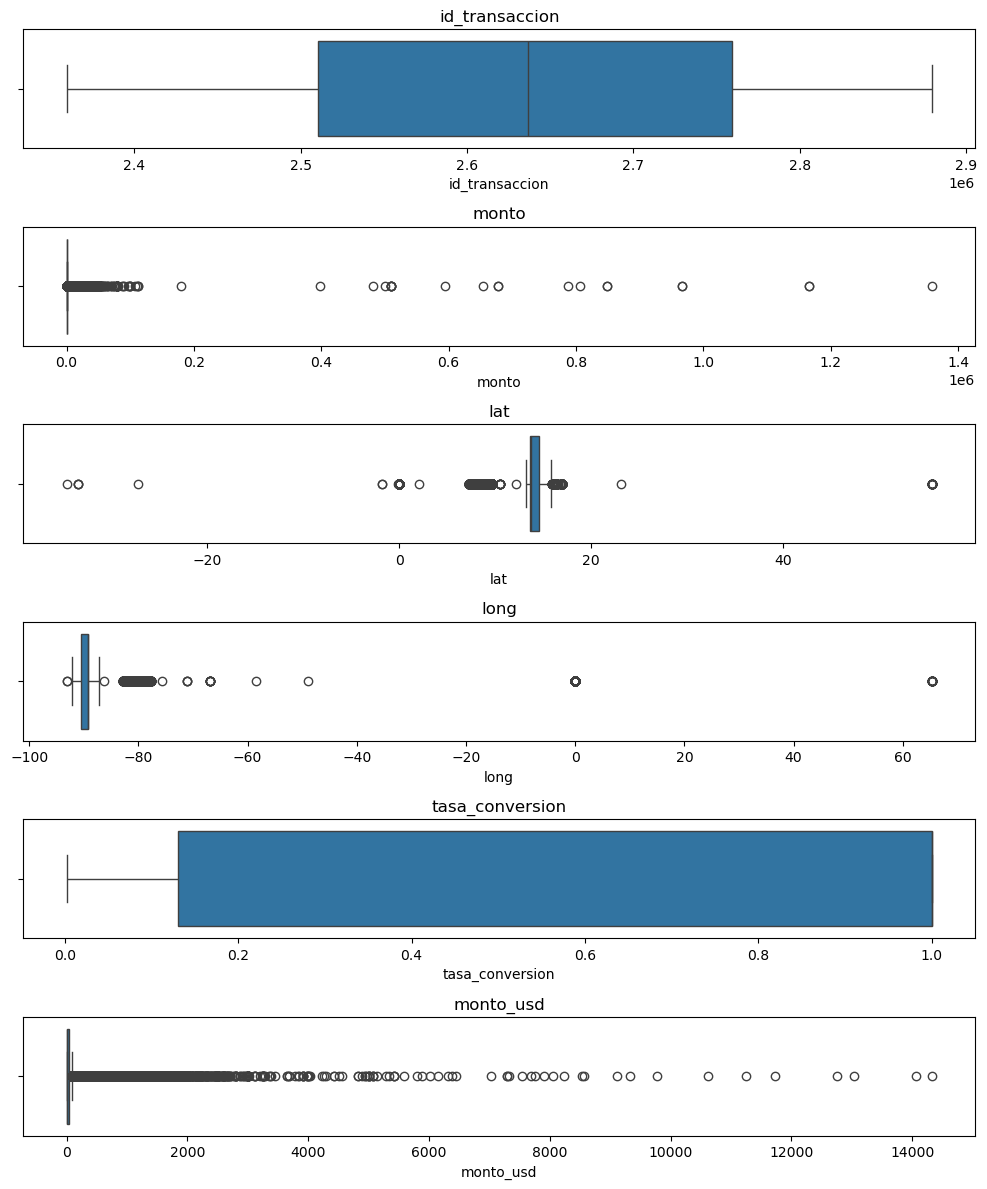

In [39]:
boxplot_analysis(df_numeric)

**NOTA IMPORTANTE**
Se observa muchos outliers en la variable **monto_usd** debido a que es la variable mas representativa del set de datos es necesario hacer un analisis riguroso de estos valores atípicos y decidir cual será su mejor tratamiento de imputación.

In [41]:
# Utilizamos nuevamente el método select_dtypes, en esta ocasión para
# determinar las columnas del DataFrame que son de tipo numérico, eso
# se logra solicitando el tipo de datos np.number.
# Luego utilizando el  método describe() se obtienen los estadísticos:
# promedio (mean),  desviación típica (std), mínimo (min), los
# percentiles 25, 50 (que corresponde con la mediana) y 75, y el
# máximo (max)
# Finalmente se utiliza el método de transposición de un DataFrame
# (.T) que permite cambiar filas a columnas y proporciona una
# visualización ordenada para cada variable

print("\nMedidas descriptivas para variables monto_usd:")
print(df['monto_usd'].describe().T)


Medidas descriptivas para variables monto_usd:
count      403535.0
mean      37.337959
std      137.612997
min             0.0
25%            5.21
50%           13.02
75%            38.0
max         14325.3
Name: monto_usd, dtype: Float64


In [42]:
def calcular_atipicos_extremos(df, num_vars):
  # Identificación de valores atípicos y extremos
  print("\nIdentificación de valores atípicos y extremos:")
  # Para cada variable en num_var (variables numéricas),
  for var in num_vars:
      # Calcula los cuartiles Q1 y Q3 usando quantile(),
      q1 = df[var].quantile(0.25)
      q3 = df[var].quantile(0.75)

      # Obtiene el rango intercuartílico (IQR)
      iqr = q3 - q1

      # Se establecen límites inferior y superior para detectar valores
      # atípicos según el método IQR
      limite_inf = q1 - 1.5 * iqr
      limite_sup = q3 + 1.5 * iqr

      print(f"Limite Inferior={limite_inf:.2f} y Limite Superior={limite_sup:.2f}" )

      # Son valores atípicos si son menores que el límite inferior o
      # superiores al límite superior. Filtramos los registros que cumplen
      # esta condición usando las condiciones lógicas de los dataframes
      outliers_iqr = df[(df[var] < limite_inf) | (df[var] > limite_sup)]

      # Se calcula la media y la desviación típica
      media = df[var].mean()
      std = df[var].std()

      # Se establecen límites inferior y superior para detectar valores
      # extremos según el método de la media y la varianza
      extremo_inferior = media - 3 * std
      extremo_superior = media + 3 * std

      print(f"Extremo Inferior={extremo_inferior:.2f} y Extremo Superior={extremo_superior:.2f}" )

      # Son valores extremos si son menores que ese límite inferior o
      # superiores a ese límite superior. Filtramos los registros
      # que cumplen esta condición usando las condiciones lógicas
      # de los dataframes
      outliers_extremo = df[(df[var] < extremo_inferior) |
                          (df[var] > extremo_superior)]

      # Se imprimen la variable, los valores atípicos y extremos
      print(f"\nVariable: {var}")
      print(f"  Atípicos (IQR): {outliers_iqr.shape[0]}")
      print(f"  Extremos (media±3σ): {outliers_extremo.shape[0]}")


def graficar_kde_hist(df, num_vars,limite_x=0):
  # Análisis de comportamiento gráfico
  # KDE plot para variables numéricas
  # Itera por cada variable numérica del dataset
  for var in num_vars:
      # Calcula la media y mediana de esa variable
      media = df[var].mean()
      mediana = df[var].median()

      # Crea un gráfico KDE con Seaborn, ignorando los valores nulos.
      # El área bajo la curva se rellena para mayor claridad visual.
      plt.figure(figsize=(6, 4))
      sns.kdeplot(df[var].dropna(), fill=True)

      #Establecer limite eje X
      if(limite_x > 0):
          plt.xlim(0, limite_x)

      # Dibuja dos líneas verticales: una roja punteada para la media
      # otra verde con puntos y guiones para la mediana, con etiquetas.
      plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
      plt.axvline(mediana, color='green', linestyle='-.',label=f'Mediana: {mediana:.2f}')

      # Añade título, etiquetas, grilla, leyenda y muestra el gráfico
      # con un ajuste automático de márgenes.
      plt.title(f'Densidad de {var}')
      plt.xlabel(var)
      plt.ylabel('Densidad')
      plt.grid(True)
      plt.legend()
      plt.tight_layout()
      plt.show()


def graficar_boxplot_var(df, var, limite_x=0):
  # Calculo de media, cuartiles, IQR y límites de atípicos
  # Esto no es necesario para el boxplot, sino para los adornos
  # Si tiene duda sobre esto, repase código del final del apartado 1.2
  media = df[var].mean()

  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3 - Q1
  limite_inf = Q1 - 1.5 * IQR
  limite_sup = Q3 + 1.5 * IQR


  # Calcular los atípicos con su número y porcentaje para poner estos
  # en el gráfico como adorno
  outliers = df[(df[var] < limite_inf) | (df[var] > limite_sup)][var]
  outlier_count = len(outliers)
  outlier_percent = (outlier_count / len(df[var].dropna())) * 100

  # Creacion de la figura
  plt.figure(figsize=(6, 5))

  # Usamos seaborn para crear boxplot
  ax = sns.boxplot(x=df[var].dropna(), showfliers=True)

  # Agregar una línea para la media
  plt.axvline(media, color='red', linestyle='--',
        label=f'Media: {media:.2f}')

  # Títulos del gráfico
  plt.title(f'Boxplot de {var} con detección de valores atípicos')
  plt.xlabel(var)
  plt.grid(True, axis='y')

  #Establecer limite eje X
  if(limite_x > 0):
     plt.xlim(0, limite_x)

  # Poner un texto con los límites, número y porcentaje de atípicos
  plt.figtext(0.5, 0.01,
    f"Valores atípicos: {outlier_count} ({outlier_percent:.2f}%)\n"
    f"Límite inferior: {limite_inf:.2f}, Límite superior: {limite_sup:.2f}",
      ha="center", fontsize=10, bbox={"facecolor":"orange",
      "alpha":0.2, "pad":5})

  plt.legend()
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])
  plt.show()

In [43]:
num_vars = ['monto_usd']
calcular_atipicos_extremos(df, num_vars)


Identificación de valores atípicos y extremos:
Limite Inferior=-43.98 y Limite Superior=87.19
Extremo Inferior=-375.50 y Extremo Superior=450.18

Variable: monto_usd
  Atípicos (IQR): 27632
  Extremos (media±3σ): 3195


In [44]:
#Analizar valores atipicos de monto_usd
# Define los límites de los rangos para el monto en USD.
# Asegúrate de que el primer valor sea 0 y el último sea mayor que el máximo de tus datos.
# --- 1. Definir percentiles ---
percentiles = np.linspace(0, 1, 11)  # 0%,10%,20%,...100%

# Calcular los valores de corte según percentiles
bins = df["monto_usd"].quantile(percentiles).values

# Asegurar que los cortes sean estrictamente crecientes para evitar errores
bins = np.unique(bins)

# --- 2. Crear etiquetas de rangos ---
labels = [
    f"[{round(bins[i], 2)} – {round(bins[i+1], 2)}]"
    for i in range(len(bins)-1)
]

# --- 3. Categorizar los datos por percentiles ---
df["rango_percentil"] = pd.cut(
    df["monto_usd"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    duplicates="drop"
)

# --- 4. Tabla de frecuencia absoluta ---
freq_abs = df["rango_percentil"].value_counts().sort_index()
n= len(df['monto_usd'])

# --- 5. Frecuencia acumulada ---
freq_acum = freq_abs.cumsum()

print("Conteo de Transacciones por Rango de Monto (USD):")
tabla_frecuencias = pd.DataFrame({
    'Intervalo (USD)': freq_abs.index,
    'Frecuencia Absoluta': freq_abs.values,
    'Frecuencia Relativa': (freq_abs.values / n).round(4),
    'Frecuencia Relativa %': (freq_abs.values / n * 100).round(2),
    'Frecuencia Acumulada': freq_abs.cumsum().values,
    'Frec. Rel. Acumulada %': (freq_abs.cumsum().values / n * 100).round(2)
})

print(tabla_frecuencias)

Conteo de Transacciones por Rango de Monto (USD):
    Intervalo (USD)  Frecuencia Absoluta  Frecuencia Relativa  \
0       [0.0 – 3.0]                55147               0.1367   
1      [3.0 – 4.43]                25685               0.0636   
2     [4.43 – 6.51]                40432               0.1002   
3     [6.51 – 10.0]                51281               0.1271   
4    [10.0 – 13.02]                30774               0.0763   
5    [13.02 – 19.0]                39184               0.0971   
6     [19.0 – 29.0]                40060               0.0993   
7    [29.0 – 49.49]                40592               0.1006   
8    [49.49 – 70.0]                41340               0.1024   
9  [70.0 – 14325.3]                39040               0.0967   

   Frecuencia Relativa %  Frecuencia Acumulada  Frec. Rel. Acumulada %  
0                  13.67                 55147                   13.67  
1                   6.36                 80832                   20.03  
2              

In [45]:
## Observamos las transacciones menores
LIMITE_SUPERIOR= 100
# Calcula el rango percentil
percentil = percentileofscore(df['monto_usd'] , LIMITE_SUPERIOR)
print(f"El limite {LIMITE_SUPERIOR} explica el {percentil:.2f}% de los datos")

df_principal = df[df['monto_usd'] <= LIMITE_SUPERIOR]
print("\nMedidas descriptivas para variables cuantitativas:")
print(df_principal['monto_usd'].describe().T)

El limite 100 explica el 94.34% de los datos

Medidas descriptivas para variables cuantitativas:
count     381191.0
mean     21.327576
std      22.112173
min            0.0
25%            5.0
50%           12.0
75%           30.0
max          100.0
Name: monto_usd, dtype: Float64


In [46]:
calcular_atipicos_extremos(df_principal, ['monto_usd'])


Identificación de valores atípicos y extremos:
Limite Inferior=-32.50 y Limite Superior=67.50
Extremo Inferior=-45.01 y Extremo Superior=87.66

Variable: monto_usd
  Atípicos (IQR): 19566
  Extremos (media±3σ): 5251


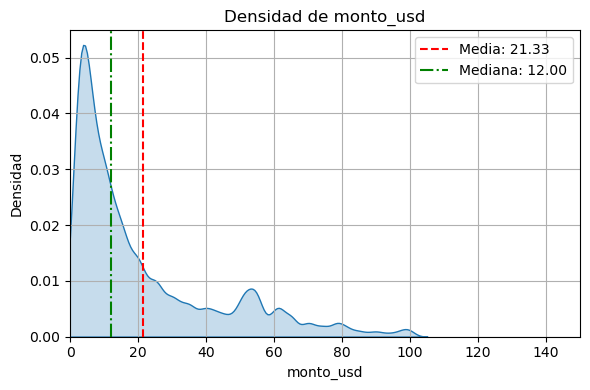

In [47]:
graficar_kde_hist(df_principal, ['monto_usd'],150)

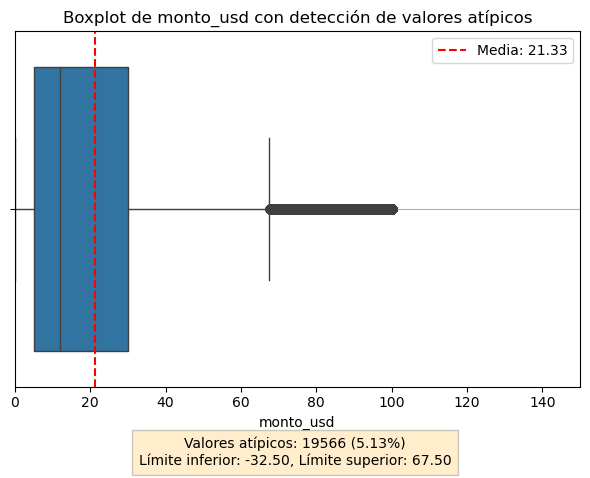

In [48]:
graficar_boxplot_var(df_principal, 'monto_usd',150)

In [49]:
df_principal.shape

(381191, 27)

In [50]:
df.head()

,id_comercio,company_created_at,categoria,is_taxpayer,tipo_comercio,banco_afiliacion_comercio,id_transaccion,monto,currency_iso,tipo_transaccion,...,vendedores,modelos_pos,pos_ids,area,tasa_conversion,monto_usd,mes,dia_semana,hora,rango_percentil
0,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2359347,37430,Colon costarricense,LINK,...,NaN,NaN,NaN,Inbound,0.001986,74.34,August,Friday,12,[70.0 – 14325.3]
1,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2359522,37430,Colon costarricense,LINK,...,NaN,NaN,NaN,Inbound,0.001986,74.34,August,Friday,0,[70.0 – 14325.3]
2,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2363347,31500,Colon costarricense,LINK,...,NaN,NaN,NaN,Inbound,0.001986,62.56,August,Friday,22,[49.49 – 70.0]
3,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2363503,29925,Colon costarricense,LINK,...,NaN,NaN,NaN,Inbound,0.001986,59.43,August,Friday,7,[49.49 – 70.0]
4,21981,2024-04-25 19:18:46,Educación y deportes,True,Society,CREDICORPBANK,2363771,37430,Colon costarricense,LINK,...,NaN,NaN,NaN,Inbound,0.001986,74.34,August,Friday,0,[70.0 – 14325.3]


In [ ]:
#Guardar resultado de Limpieza y transaformacion
df.to_csv('../dataset/Fintech_EDA.csv', index=False)

## INTERPRETACIONES ##
* La distribución sigue siendo fuertemente asimétrica. La Mediana es el centro de la actividad transaccional (12 USD) (el 50% de los datos). Su posición tan cerca del borde izquierdo de la caja confirma nuevamente la fuerte asimetría positiva.
* Es el Primer Cuartil (<10 USD). El 25% de las transacciones caen por debajo de este monto.
* Es el Tercer Cuartil (un poco menos de <40 USD). El 75% de las transacciones caen por debajo de este monto.
* El bigote inferior no es visible, ya que el mínimo de los datos (0.00 USD) es muy cercano al Q1.
* La longitud del bigote superior es mucho más larga que la distancia entre Q1 y Q3, lo que visualmente confirma la asimetría a la derecha.
* Existe un 5.13% de atípicos en este segmento analizado cantidades superiores a 70 USD

# SELECCION Y PREPROCESAMIENTO DE VARIABLES PARA ANALISIS NO SUPERVISADO #
Se procede a seleccionar las variables mas relevantes para aplicar modelos de reducción de dimensionalidad y para clusterizacion


In [53]:
df_features = df.copy()
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_comercio                403535 non-null  category      
 1   company_created_at         403535 non-null  datetime64[ns]
 2   categoria                  403535 non-null  category      
 3   is_taxpayer                403535 non-null  bool          
 4   tipo_comercio              403535 non-null  category      
 5   banco_afiliacion_comercio  403142 non-null  category      
 6   id_transaccion             403535 non-null  Int64         
 7   monto                      403535 non-null  Int64         
 8   currency_iso               403535 non-null  category      
 9   tipo_transaccion           403535 non-null  category      
 10  modo_lectura               348731 non-null  category      
 11  pos_id                     348731 non-null  category

In [54]:
#ELIMINAMOS VARIABLES QUE SON DE TIPO IDENTIFICADORES O QUE NO APORTAN INFORMACION RELEVANTE PARA EL ANALISIS
#Se eliminan todos los ids identificadores
#Se eliminan datos irrelevantes o usados exclusivamente para transaformacion
#Se utilizara el monto convertido a dolares por lo que monto, currency_iso y tasa_conversion no nos interesa
columnas_a_eliminar = ['id_comercio','id_transaccion','vendedores','pos_id','pos_ids','modo_lectura','modelos_pos','rango_percentil','tasa_conversion','monto','currency_iso']
# Opción 2: Modificar el DataFrame original (inplace=True)
df_features.drop(columns=columnas_a_eliminar, axis=1, inplace=True)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   company_created_at         403535 non-null  datetime64[ns]
 1   categoria                  403535 non-null  category      
 2   is_taxpayer                403535 non-null  bool          
 3   tipo_comercio              403535 non-null  category      
 4   banco_afiliacion_comercio  403142 non-null  category      
 5   tipo_transaccion           403535 non-null  category      
 6   transaction_created_at     403535 non-null  datetime64[ns]
 7   lat                        346993 non-null  float64       
 8   long                       346993 non-null  float64       
 9   card_brand                 401567 non-null  category      
 10  pais                       403535 non-null  category      
 11  area                       403535 non-null  category

**Notas**
Se obtienen 13 variables relevantes para el analisis y/o aplicacion de modelos no supervisados
* Las variables continuas como **lat** y **lomg** no requieren tratamiento adicional pero se deben imputar registros con valores para no perder información ya que es un 14%
* La variable **monto_usd** debido a que presenta un sesgo pronuncioado a la derecha se recomienda aplicar una transformación logaritmica para evitar sesgos en el analisis debido a los valores atipicos.
* Tomamos la fecha de transaccion **transaction_created_at** en diferentes unidades de medida en los que nos interesa hacer analisis temporales
* Se calcula la antigüedad del comercio en dias a la fecha de la transaccion **company_created_at**
* Se codifican el resto de las variables categoricas nominales con One-Hot Encoding

In [56]:
#long y lat
nulos_conteo = df_features[['lat','long']].isnull().sum()
print(nulos_conteo)


lat     56542
long    56542
dtype: int64


In [57]:
#Como los datos nulos son muchos
#imputar con la mediana de la zona geografica es decir por cada pais
df_features['lat'] = df_features.groupby('pais', observed=False)['lat'].transform(lambda x: x.fillna(x.median()))
df_features['long'] = df_features.groupby('pais', observed=False)['long'].transform(lambda x: x.fillna(x.median()))

df_features.isnull().sum()


company_created_at              0
categoria                       0
is_taxpayer                     0
tipo_comercio                   0
banco_afiliacion_comercio     393
tipo_transaccion                0
transaction_created_at          0
lat                             0
long                            0
card_brand                   1968
pais                            0
area                            0
monto_usd                       0
mes                             0
dia_semana                      0
hora                            0
dtype: int64

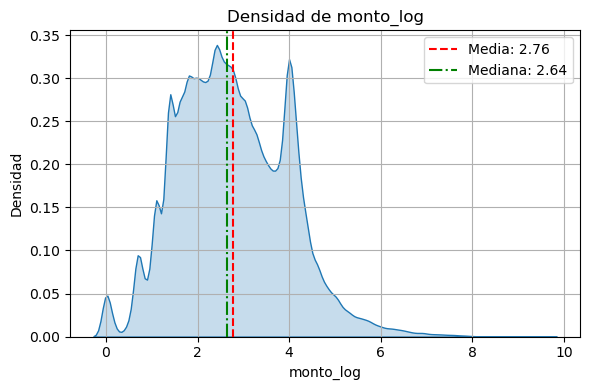

In [58]:
#Transformar monto_usd a monto_log para reducir influencia del sesgo positivo
df_features["monto_log"] = np.log1p(df_features["monto_usd"])
df_features[['monto_usd','monto_log']].head()

#Eliminar monto_usd
df_features.drop(columns=['monto_usd'], axis=1, inplace=True)

#graficar nueva distribucion
graficar_kde_hist(df_features, ['monto_log'])

In [59]:
#Descomponemos transaction_created_at en variables medibles para analisis
#No agregamos año porque todos los datos son del 2025 asi que es irrelevante
df_features["mes"] = df_features["transaction_created_at"].dt.month
df_features["dia_semana"] = df_features["transaction_created_at"].dt.dayofweek
df_features["hora"] = df_features["transaction_created_at"].dt.hour

#Calcular antiguedad comercio desde company_created_at a la fecha de transaccion transaction_created_at
df_features["antiguedad_dias_comercio"] = (
    df_features["transaction_created_at"] - df_features["company_created_at"]
).dt.days

#Una vez descomuesta la informacion Eliminamos las variables de tiempo originales
df_features.drop(columns=['transaction_created_at','company_created_at'], axis=1, inplace=True)

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   categoria                  403535 non-null  category
 1   is_taxpayer                403535 non-null  bool    
 2   tipo_comercio              403535 non-null  category
 3   banco_afiliacion_comercio  403142 non-null  category
 4   tipo_transaccion           403535 non-null  category
 5   lat                        403535 non-null  float64 
 6   long                       403535 non-null  float64 
 7   card_brand                 401567 non-null  category
 8   pais                       403535 non-null  category
 9   area                       403535 non-null  category
 10  mes                        403535 non-null  int32   
 11  dia_semana                 403535 non-null  int32   
 12  hora                       403535 non-null  int32   
 13  monto_log     

In [60]:
# 1. Seleccionar solo las columnas de tipo 'category'
df_categoricas = df_features.select_dtypes(include='category')

# 2. Aplicar nunique() a estas columnas para obtener el conteo de valores únicos en cada una
conteo_unicos_categorias = df_categoricas.nunique()

print(conteo_unicos_categorias)

categoria                    1944
tipo_comercio                   2
banco_afiliacion_comercio      47
tipo_transaccion               11
card_brand                      2
pais                            3
area                            2
dtype: int64


In [61]:
#Se excluyen las variables "categoria" y "banco_afiliacion_comercio" del analisis por tener demasiados valores
df_features.drop(columns=['categoria','banco_afiliacion_comercio'], axis=1, inplace=True)

#Aplicar One-Hot Encoding a categorias con cantidad de valores manejables
df_features = pd.get_dummies(df_features, columns=[
    "tipo_comercio", "tipo_transaccion", "card_brand", "pais", "area"
], drop_first=False)

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   is_taxpayer                               403535 non-null  bool   
 1   lat                                       403535 non-null  float64
 2   long                                      403535 non-null  float64
 3   mes                                       403535 non-null  int32  
 4   dia_semana                                403535 non-null  int32  
 5   hora                                      403535 non-null  int32  
 6   monto_log                                 403535 non-null  Float64
 7   antiguedad_dias_comercio                  403535 non-null  int64  
 8   tipo_comercio_Natural person              403535 non-null  bool   
 9   tipo_comercio_Society                     403535 non-null  bool   
 10  tipo_transaccion_CAS

In [62]:
#Finalmente convertimos las columnas de tipo bool a enteros de 0 y 1 por si el modelo aplicar no soporta los booleanos
dummy_cols = df_features.select_dtypes(include=['bool']).columns
df_features[dummy_cols] = df_features[dummy_cols].astype(int)

#Resumen de las features finales
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403535 entries, 0 to 403534
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   is_taxpayer                               403535 non-null  int32  
 1   lat                                       403535 non-null  float64
 2   long                                      403535 non-null  float64
 3   mes                                       403535 non-null  int32  
 4   dia_semana                                403535 non-null  int32  
 5   hora                                      403535 non-null  int32  
 6   monto_log                                 403535 non-null  Float64
 7   antiguedad_dias_comercio                  403535 non-null  int64  
 8   tipo_comercio_Natural person              403535 non-null  int32  
 9   tipo_comercio_Society                     403535 non-null  int32  
 10  tipo_transaccion_CAS

In [63]:
#Vemos una muestra de los datos finales
df_features.head()

,is_taxpayer,lat,long,mes,dia_semana,hora,monto_log,antiguedad_dias_comercio,tipo_comercio_Natural person,tipo_comercio_Society,...,tipo_transaccion_REUSABLE-WITH-AMOUNT,tipo_transaccion_REUSABLE-WITHOUT-AMOUNT,tipo_transaccion_SUBSCRIPTION,card_brand_mastercard,card_brand_visa,pais_El Salvador,pais_Guatemala,pais_Panamá,area_Inbound,area_Outbound
0,1,8.989382,-79.53676,8,4,12,4.322011,462,0,1,...,0,0,0,1,0,0,0,1,1,0
1,1,8.989382,-79.53676,8,4,0,4.322011,462,0,1,...,0,0,0,0,1,0,0,1,1,0
2,1,8.989382,-79.53676,8,4,22,4.151984,463,0,1,...,0,0,0,0,1,0,0,1,1,0
3,1,8.989382,-79.53676,8,4,7,4.101486,462,0,1,...,0,0,0,0,1,0,0,1,1,0
4,1,8.989382,-79.53676,8,4,0,4.322011,462,0,1,...,0,0,0,0,1,0,0,1,1,0


In [64]:
df_features.isnull().sum()

is_taxpayer                                 0
lat                                         0
long                                        0
mes                                         0
dia_semana                                  0
hora                                        0
monto_log                                   0
antiguedad_dias_comercio                    0
tipo_comercio_Natural person                0
tipo_comercio_Society                       0
tipo_transaccion_CASH                       0
tipo_transaccion_LINK                       0
tipo_transaccion_LINK-API                   0
tipo_transaccion_LINK-MSI                   0
tipo_transaccion_POS                        0
tipo_transaccion_POS-MSI                    0
tipo_transaccion_QR                         0
tipo_transaccion_QR-MSI                     0
tipo_transaccion_REUSABLE-WITH-AMOUNT       0
tipo_transaccion_REUSABLE-WITHOUT-AMOUNT    0
tipo_transaccion_SUBSCRIPTION               0
card_brand_mastercard             

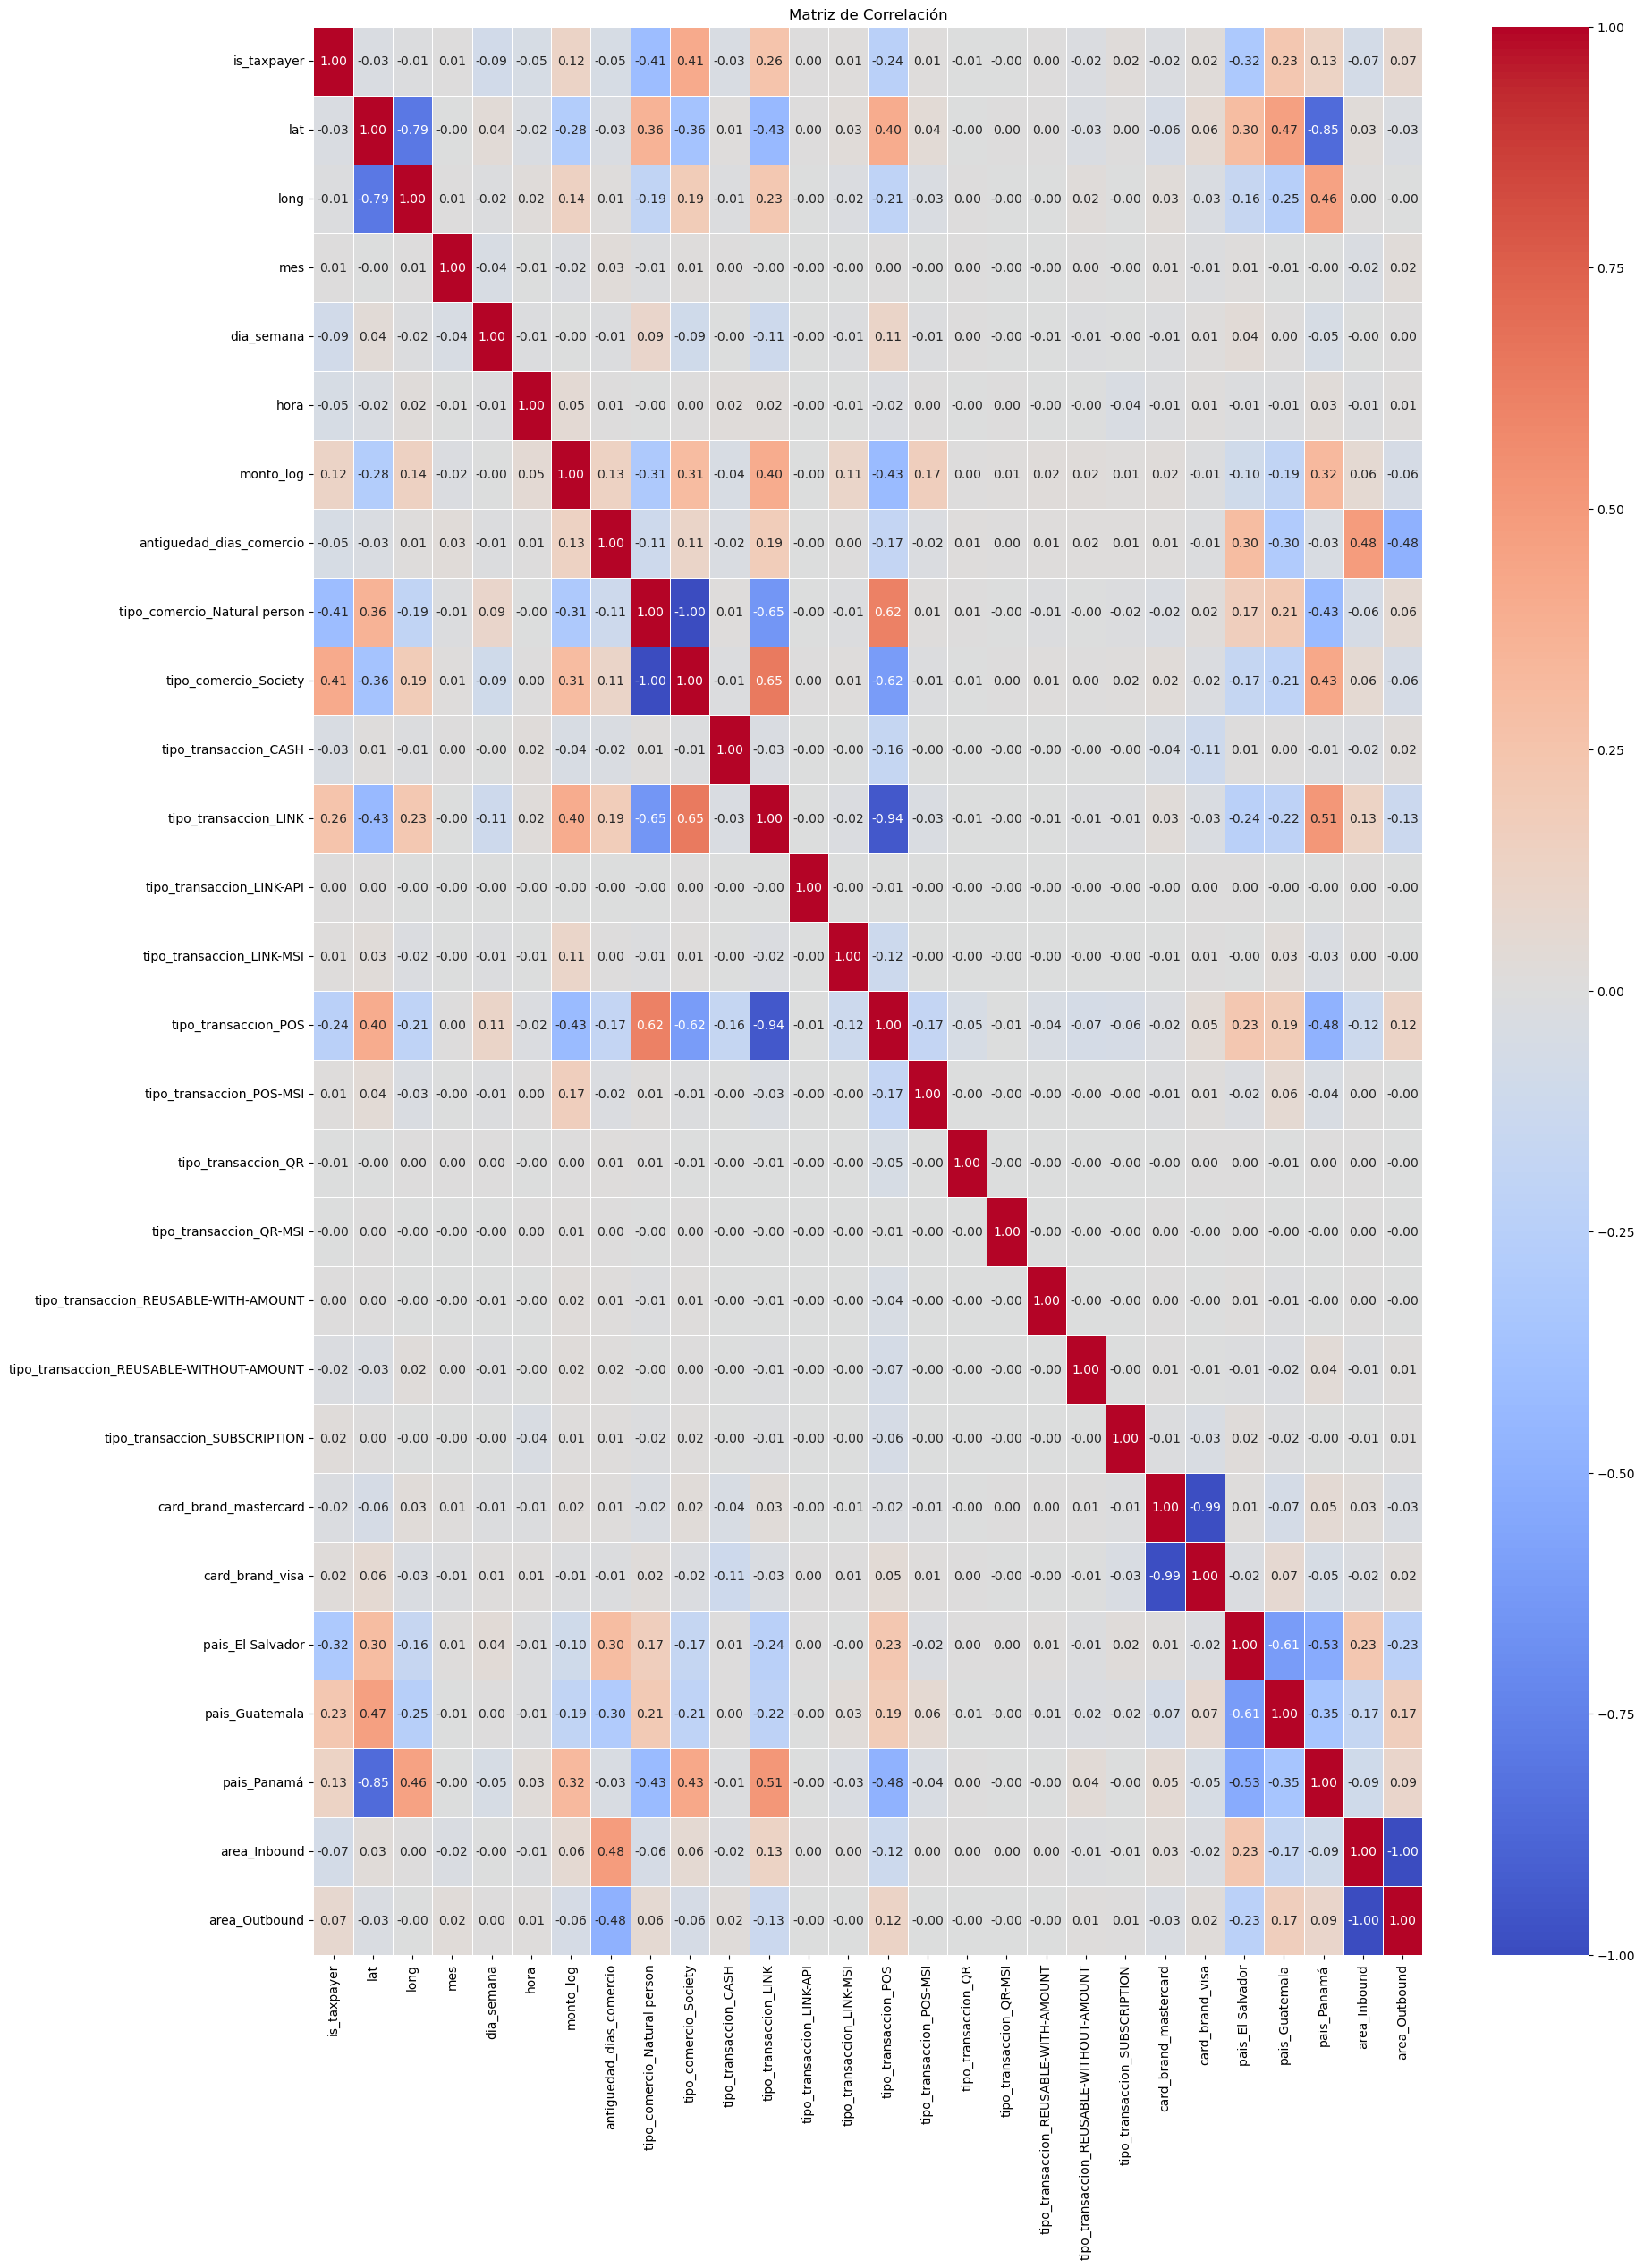

In [65]:
#Matriz de Correlación
### Análisis de Correlación
num_cols = df_features.columns
correlation_matrix = df_features.corr()
    
# Configura el estilo de la figura
plt.figure(figsize=(20, len(num_cols)))
    
# Crea un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
   
# Añade título
plt.title("Matriz de Correlación")
    
# Muestra la visualización
plt.show()

In [66]:
#Guardar resultado de EDA y Preprocesamiento en un archivo csv
# Guarda el DataFrame en la ruta y nombre de archivo especificados
df_features.to_csv('../dataset/Fintech_Features.csv', index=False)